In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# loading the data-set
data = pd.read_csv("delivery_time.csv")
data.head(3)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6


In [4]:
## copy the data
data_copy = data.copy()

### Understanding the data

In [6]:
## shape of the data
print("total rows in data is : ",data.shape[0])
print("total columns in data is : ",data.shape[1])

total rows in data is :  21
total columns in data is :  2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


* There are 21 rows and 2 columns.delivery time is float data type and sorting time is integer data type.

In [8]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [9]:
data.isnull().any()

Delivery Time    False
Sorting Time     False
dtype: bool

* There is no null value in dataset

In [10]:
data.index

RangeIndex(start=0, stop=21, step=1)

In [11]:
## columns in dataset
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [12]:
## statistical details of dataset
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


* No more gap in min and max data. so variation is less. STD is also low

In [13]:
## number of unique values in columns
data.nunique()

Delivery Time    21
Sorting Time      9
dtype: int64

### Checking of outliers in dataset

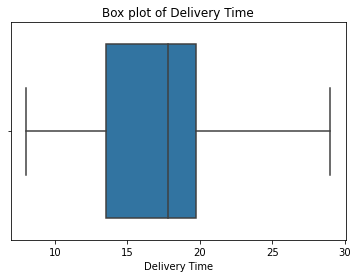

In [14]:
sns.boxplot(x=data['Delivery Time'])
plt.title("Box plot of Delivery Time")
plt.show()

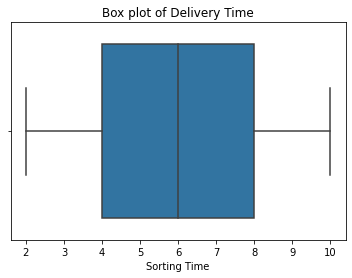

In [15]:
sns.boxplot(x=data['Sorting Time'])
plt.title("Box plot of Delivery Time")
plt.show()

* No outliers in the dataset

In [16]:
## correlation in dataset
corr = data.corr()
corr


,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


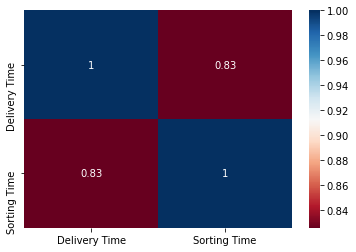

In [20]:
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

* Correlation co-eeficient is more, so they have strong correlation(positive correlation).

## EDA(Exploratary data analysis)

In [23]:
## Average of delivery time
print("Average delivery time is - ",round(data['Delivery Time'].mean(),0))

Average delivery time is -  17.0


In [24]:
## Minimum of delivery time
print("Minimum delivery time is - ",round(data['Delivery Time'].min(),0))

Minimum delivery time is -  8.0


In [25]:
## Maximum of delivery time
print("Maximum delivery time is - ",round(data['Delivery Time'].max(),0))

Maximum delivery time is -  29.0


In [27]:
## Average of sorting time time
print("Average sorting time is - ",round(data['Sorting Time'].mean(),0))

Average sorting time is -  6.0


In [28]:
## Minimum of sorting time
print("Minimum sorting time is - ",round(data['Sorting Time'].min(),0))

Minimum sorting time is -  2


In [29]:
## Maximum of sorting time
print("Maximum sorting time is - ",round(data['Sorting Time'].max(),0))

Maximum sorting time is -  10


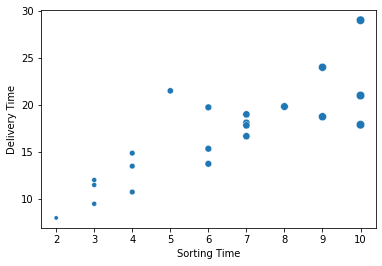

In [30]:
sns.scatterplot(x='Sorting Time',y='Delivery Time',data=data,marker='o',size='Sorting Time',legend=None)
plt.show()

* Sorting time is highly correlated with the delivery time. Delivery time and sorting time is directly propotional.
* If delivery time increases then sorting time also increases.

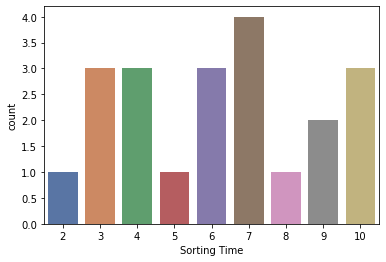

In [31]:
sns.countplot(x='Sorting Time',data=data,palette='deep')
plt.show()

* Sorting time 7 is occure maximum times ,so maximum number of sorting is at 7

## Feature Engineering and Machine Learning model

* Dataset is having one input to predcit output & linear plot is straight, so we will build simple linear regression  model.

In [32]:
## importing scikit library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [33]:
## set input and output of dataset
## x - independent varibale i.e delivery time
## y - dependent variable i.e sorting time

y=data['Delivery Time']
x=data['Sorting Time']

In [35]:
y.head(2)

0    21.0
1    13.5
Name: Delivery Time, dtype: float64

In [36]:
x.head(2)

0    10
1     4
Name: Sorting Time, dtype: int64

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1234)

In [41]:
x_train.shape, y_train.shape

((16,), (16,))

In [43]:
x_test.shape,y_test.shape

((5,), (5,))

In [44]:
x_train=x_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)

In [45]:
model = LinearRegression()

In [46]:
model_fit = model.fit(x_train,y_train)

In [47]:
## intercept of model
print(model_fit.intercept_)

[6.66384615]


In [48]:
## coefficient of model
print(model_fit.coef_)

[[1.60153846]]


In [51]:
y_pred=model_fit.predict(x_test)
y_pred

array([[21.07769231],
       [11.46846154],
       [16.27307692],
       [16.27307692],
       [11.46846154]])

In [52]:
data_y_pred = pd.DataFrame(y_pred,columns=["pred"])
data_y_pred

,pred
0,21.077692
1,11.468462
2,16.273077
3,16.273077
4,11.468462


In [53]:
data_y_pred['actual']=y_test.values

In [54]:
print(data_y_pred)

        pred  actual
0  21.077692   24.00
1  11.468462   11.50
2  16.273077   19.75
3  16.273077   13.75
4  11.468462   12.03


In [55]:
r2_score(data_y_pred['pred'],data_y_pred['actual'])

0.5774636053428878

* r_square value is 0.57, so built model is towards 1 so it is good model.

In [56]:
mean_absolute_error(data_y_pred['pred'],data_y_pred['actual'])

1.9030769230769227

In [57]:
mean_squared_error(data_y_pred['pred'],data_y_pred['actual'])

5.462222721893498

In [58]:
from math import sqrt

In [60]:
sqrt(mean_squared_error(data_y_pred['pred'],data_y_pred['actual']))

2.3371398592924426

* Model coefficient of determination is 0.57, so model is good fit.